In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./Mittaus 1/Accelerometer.csv')
df.head()

,time,seconds_elapsed,z,y,x
0,1696508104459439600,0.143440,-2.846008,-0.581977,-0.468246
1,1696508104475217200,0.159217,-2.651466,-0.560432,-0.418557
2,1696508104491116800,0.175117,-2.132024,-0.366186,-0.535990
3,1696508104506986000,0.190986,-1.023350,-0.041039,-0.522485
4,1696508104522763500,0.206763,-0.449766,0.229015,-0.356920


C:\Users\janit\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


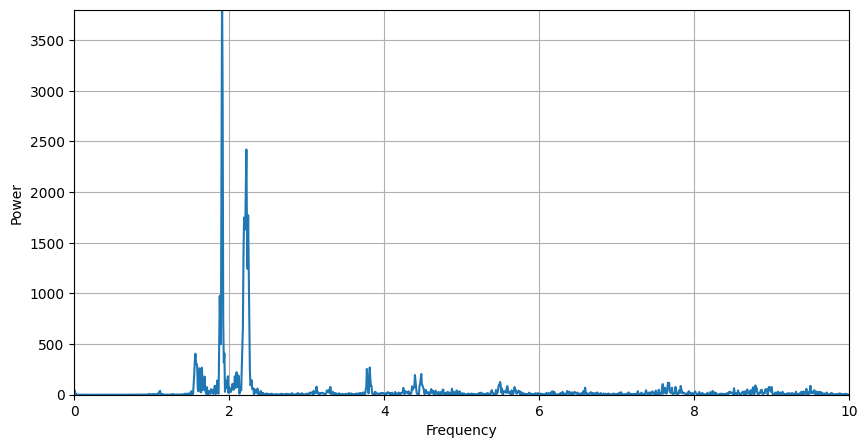

Eniten tehoa sisältävä taajuus on  1.8979626662812987 Hz
Dominoivan taajuuden jaksojen määrä on  254.0


In [8]:
az = df['z'] #Acceleration
t = df['seconds_elapsed'] #Time
T= df['seconds_elapsed'][len(df)-1] - df['seconds_elapsed'][0]   # Sample Period
#Lasketaan kohinaisen signaalin Fourier-muunnos F

n = len(az)
F = np.fft.fft(az)
#Lasketaan tehospektri
PSD = F*np.conj(F)/n
freq = np.arange(n)*1/T # Tässä T on aika signaalin alusta loppuun
L = np.arange(1,np.floor(n/2),dtype = 'int')

fig = plt.figure(figsize = (10,5))
plt.plot(freq[L],PSD[L])
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.axis([0, 10, 0, 3800])
plt.grid()
plt.show()

max_power_f = freq[np.argmax(PSD[L])]
print('Eniten tehoa sisältävä taajuus on ', max_power_f, 'Hz' )
print('Dominoivan taajuuden jaksojen määrä on ', max_power_f*T)

In [9]:
print('Amount of steps taken', round(max_power_f*T))

Amount of steps taken 254
